# Brain Tumor Classification (MRI)
#Dataset - https://www.kaggle.com/sartajbhuvaji/brain-tumor-classification-mri

## Importing the libraries

In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
tf.__version__

'2.7.0'

In [2]:
from tensorflow import keras

## Preprocessing the Training set

In [3]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

In [4]:
training_set = train_datagen.flow_from_directory('dataset_large/training_set',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                             class_mode = 'binary')

Found 2870 images belonging to 2 classes.


## Preprocessing the Test set

In [5]:
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory('dataset_large/test_set',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 220 images belonging to 2 classes.


## Part 2 - Building the CNN

In [7]:
# Initialising the CNN
cnn = tf.keras.models.Sequential()

In [8]:
# Step 1 - Convolution
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))

In [9]:
# Step 2 - Pooling
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

In [10]:
# Adding a second convolutional layer
cnn.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

In [11]:
# Step 3 - Flattening
cnn.add(tf.keras.layers.Flatten())

In [12]:
# Step 4 - Full Connection
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

In [13]:
# Step 5 - Output Layer
cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [14]:
# Part 3 - Training the CNN

# Compiling the CNN
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [17]:
# Training the CNN on the Training set and evaluating it on the Test set
cnn.fit(x = training_set, validation_data = test_set, epochs = 20)

Epoch 1/20
90/90 [==============================] - 15s 166ms/step - loss: 0.1057 - accuracy: 0.9571 - val_loss: 0.5887 - val_accuracy: 0.7182
Epoch 2/20
90/90 [==============================] - 15s 163ms/step - loss: 0.1024 - accuracy: 0.9571 - val_loss: 0.8683 - val_accuracy: 0.5955
Epoch 3/20
90/90 [==============================] - 14s 160ms/step - loss: 0.1130 - accuracy: 0.9530 - val_loss: 0.6776 - val_accuracy: 0.6955
Epoch 4/20
90/90 [==============================] - 14s 159ms/step - loss: 0.0953 - accuracy: 0.9638 - val_loss: 0.4951 - val_accuracy: 0.7727
Epoch 5/20
90/90 [==============================] - 15s 165ms/step - loss: 0.0839 - accuracy: 0.9669 - val_loss: 0.6527 - val_accuracy: 0.6909
Epoch 6/20
90/90 [==============================] - 14s 160ms/step - loss: 0.0791 - accuracy: 0.9679 - val_loss: 0.5577 - val_accuracy: 0.7455
Epoch 7/20
90/90 [==============================] - 14s 159ms/step - loss: 0.0826 - accuracy: 0.9679 - val_loss: 0.8011 - val_accuracy: 0.6591

## Model Summary

In [18]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 12544)             0         
                                                                 
 dense (Dense)               (None, 128)               1

## Saving The Model

In [19]:
cnn.save("tumor_model.h5")

## Loaded Model

In [33]:
loaded_model = tf.keras.models.load_model("tumor_model.h5")
x = loaded_model.summary()
x

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 12544)             0         
                                                                 
 dense (Dense)               (None, 128)               1

## Prediction

In [21]:
import numpy as np
from tensorflow.keras.preprocessing import image
test_image = image.load_img('dataset/single_prediction/yes_or_no.jpg', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)
training_set.class_indices
print(result)
print()

[[1.]]



In [22]:
if result[0][0] == 1:
    prediction = 'yes'
else:
    prediction = 'no'
print(prediction)

yes


In [23]:
from tensorflow.keras.models import load_model
cnn1 = load_model('tumor_model.h5')

In [24]:
img = image.load_img('dataset/single_prediction/yes_or_no2.jpg', target_size = (64, 64))
test_imag = image.img_to_array(img)
test_img = np.expand_dims(test_imag, axis = 0)

In [25]:
test_img.shape

(1, 64, 64, 3)

In [26]:
cnn1.predict(test_img)

array([[0.]], dtype=float32)

In [27]:
test_image1 = image.load_img('dataset/single_prediction/yes_or_no3.jpg', target_size = (64, 64))
test_image2 = image.img_to_array(test_image1)
test_image3 = np.expand_dims(test_image2, axis = 0)
test_image3.shape

(1, 64, 64, 3)

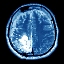

In [28]:
test_image1